# 三明のノートブック
## 分析内容
視聴時間毎の文末における「草」の頻度分析

## 前処理
### 汎用的なものをimport

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

### データの読み込み

In [2]:
df_comment = pd.read_csv("./data/comments.csv", header=0, index_col=None, parse_dates=["inserted_at"])

### 時間とコメントのみの分析

In [3]:
# データの切り出し
df_com_time  = df_comment[["inserted_at","message","content_id"]].copy()
df_com_time["inserted_at"] = pd.to_datetime(df_com_time["inserted_at"],utc=True)
# 日本時間にする
df_com_time.index = pd.DatetimeIndex(df_com_time.inserted_at, name="inserted_at")
df_com_time.index = df_com_time.index.tz_convert("Asia/Tokyo")
df_comment_time = df_com_time[["content_id","message"]].copy()
df_comment_time

#df_com_time.inserted_at = df_com_time.index
# df_com_time.index = df_com_time.index.strftime('%Y年%m月%d日 %H時%M分%S秒') # 日本時間に変換できているかの確認用
# df_comment_time = df_com_time.reset_index(drop=True).copy()

,content_id,message
inserted_at,,
2021-11-01 00:00:16+09:00,1016369,アニメ化おめでとう！！！！！
2021-11-01 00:00:30+09:00,1016369,アニメ化おめでとう！！まじか？！
2021-11-01 00:00:35+09:00,1016369,遂にアニメ化来た！おめでとう！！！！
2021-11-01 00:00:40+09:00,1016369,やっぱりアニメ化か！おめでとうございます🎊
2021-11-01 00:00:41+09:00,1016369,おめでとうアニメ化！アーニャ可愛いなぁ
...,...,...
2022-03-31 18:27:27+09:00,1026940,キャラデザすごすぎぃ…ウルト○マンに出てくる怪獣みたいに洗練されてるじゃん…
2022-03-31 18:47:30+09:00,1025345,雷(トニト)一閃は草
2022-03-31 19:18:28+09:00,1026940,ジジは何食べてそんなにデカくなったんだ


### 文末が特定のワードのものを抜き出す  
抜き出すワード  
- 草
- w
- 笑

In [4]:
df_only_target = df_comment_time[df_comment_time["message"].str.match('.*(草|w|笑)$')]
df_only_target

,content_id,message
inserted_at,,
2021-11-01 00:02:34+09:00,1016369,12P完璧にどっかの骨川で草
2021-11-01 00:02:46+09:00,1016369,コメ欄でアニメ化を知って感想吹き飛んだ笑
2021-11-01 00:03:42+09:00,1016369,うんこが漏れそうは草
2021-11-01 00:05:14+09:00,1016369,ハナクソ草
2021-11-01 00:05:23+09:00,1016369,残りのうんこ爆弾が…www
...,...,...
2022-03-31 13:04:39+09:00,1026940,ペニーチンコスw
2022-03-31 13:53:46+09:00,1025345,トニとおばさんなんか好きww
2022-03-31 16:09:38+09:00,1026359,らんまw


## 人がよく「w,草,笑」を文末で使う時間帯の可視化
### 時間帯ごとのデータの切り方の例

In [5]:
hoge = df_only_target.between_time("0:00:00", "6:00:00")
hoge.index = hoge.index.strftime('%Y年%m月%d日 %H時%M分%S秒') # 日本時間に変換できているかの確認用

### 2時間毎にデータの内訳を確認

In [6]:
delimitation = list(range(0,24,2))
delimitation.append(0)
rate_arr = []　# 対象となる単語を含むコメントの割合
for i in range(len(delimitation) - 1):
    total_num = df_comment_time.between_time("{}:00:00".format(delimitation[i]),
                                             "{}:00:00".format(delimitation[i+1])).shape[0]
    target_num = df_only_target.between_time("{}:00:00".format(delimitation[i]),
                                             "{}:00:00".format(delimitation[i+1])).shape[0]
    rate_arr.append(target_num / total_num * 100)
    print("{0}時 - {1}時\t| {2:.2f}% \ttotal: {3}, \ttarget: {4}".format(delimitation[i],
                                                                        delimitation[i+1],
                                                                        rate_arr[-1], 
                                                                        total_num,
                                                                        target_num))

0時 - 2時	| 5.79% 	total: 40676, 	target: 2355
2時 - 4時	| 5.08% 	total: 6402, 	target: 325
4時 - 6時	| 4.86% 	total: 3433, 	target: 167
6時 - 8時	| 5.10% 	total: 7764, 	target: 396
8時 - 10時	| 5.57% 	total: 9013, 	target: 502
10時 - 12時	| 6.11% 	total: 6347, 	target: 388
12時 - 14時	| 6.16% 	total: 6412, 	target: 395
14時 - 16時	| 7.02% 	total: 4204, 	target: 295
16時 - 18時	| 6.22% 	total: 3984, 	target: 248
18時 - 20時	| 5.75% 	total: 4139, 	target: 238
20時 - 22時	| 5.41% 	total: 4440, 	target: 240
22時 - 0時	| 6.45% 	total: 4406, 	target: 284


### ヒストグラムの描画
#### 全てのコメント数

AttributeError: 'Rectangle' object has no property 'fontsize'

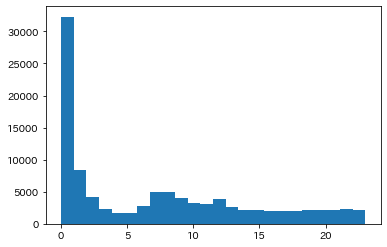

In [ ]:
plt.hist(np.asarray(df_comment_time.index.hour), bins=24)
plt.show()

#### 対象となるコメント数

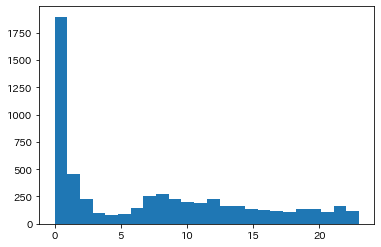

In [8]:
plt.hist(np.asarray(df_only_target.index.hour), bins=24)
plt.show()

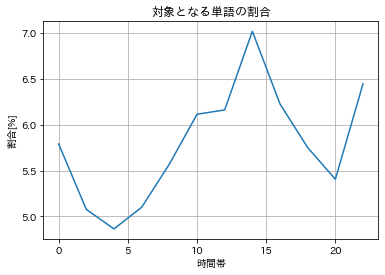

In [9]:
plt.plot(delimitation[:-1], rate_arr)
plt.title("対象となる単語を含むコメントの割合")
plt.xlabel("時間帯") 
plt.ylabel("割合[%]") 
plt.grid(True)

## 作品ごとの文末表現の違い
### データフレームの作成

In [38]:
# データの読み出し
df_con = pd.read_csv("./data/contents.csv",header=0,index_col=None)
df_com = pd.read_csv("./data/comments.csv", header=0, index_col=None, parse_dates=["inserted_at"])

# データの切り出し
df_com_reduced  = df_com[["inserted_at","message","content_id"]]
df_con_reduced  = df_con[["work_name", "content_id"]]

# データのマージ
df_com_time = df_con_reduced.merge(df_com_reduced, on=["content_id"])

# 日本時間にする
df_com_time["inserted_at"] = pd.to_datetime(df_com_time["inserted_at"],utc=True)
df_com_time.index = pd.DatetimeIndex(df_com_time.inserted_at, name="inserted_at")
df_com_time.index = df_com_time.index.tz_convert("Asia/Tokyo")
df_comment_time = df_com_time[["work_name","message"]].copy()

# 特定のワードで切り出す
df_only_target = df_comment_time[df_comment_time["message"].str.match('.*(草|w|笑)$')]

['阿波連さんははかれない', '左ききのエレン', 'SPY×FAMILY', '怪獣８号', '鴨乃橋ロンの禁断推理', 'ダンダダン']

### 作品毎の対象となる単語を含むコメントの割合を算出

In [43]:
# 作品名のリスト
work_name_list = list(df_con[["work_name"]][~df_con[["work_name"]].duplicated()].work_name)

rate_dict = {}

for work_name in work_name_list:
    rate_arr = [] # 対象となる単語を含むコメントの割合
    print("---------------------------------")
    print("作品名: {}".format(work_name))
    df_work = df_comment_time[df_comment_time["work_name"] == work_name]
    df_work_target = df_only_target[df_only_target["work_name"] == work_name]
    for i in range(len(delimitation) - 1):
        total_num = df_work.between_time("{}:00:00".format(delimitation[i]),
                                         "{}:00:00".format(delimitation[i+1])).shape[0]
        target_num = df_work_target.between_time("{}:00:00".format(delimitation[i]),
                                                 "{}:00:00".format(delimitation[i+1])).shape[0]
        rate_arr.append(target_num / total_num * 100)
        print("{0}時 - {1}時\t| {2:.2f}% \ttotal: {3}, \ttarget: {4}".format(delimitation[i],
                                                                            delimitation[i+1],
                                                                            rate_arr[-1], 
                                                                            total_num,
                                                                            target_num))
    rate_dict[work_name] = rate_arr

---------------------------------
作品名: 阿波連さんははかれない
0時 - 2時	| 8.36% 	total: 1699, 	target: 142
2時 - 4時	| 6.46% 	total: 294, 	target: 19
4時 - 6時	| 11.03% 	total: 145, 	target: 16
6時 - 8時	| 7.09% 	total: 254, 	target: 18
8時 - 10時	| 5.91% 	total: 389, 	target: 23
10時 - 12時	| 7.64% 	total: 301, 	target: 23
12時 - 14時	| 8.04% 	total: 224, 	target: 18
14時 - 16時	| 7.59% 	total: 145, 	target: 11
16時 - 18時	| 2.44% 	total: 123, 	target: 3
18時 - 20時	| 6.48% 	total: 108, 	target: 7
20時 - 22時	| 8.03% 	total: 137, 	target: 11
22時 - 0時	| 7.04% 	total: 142, 	target: 10
---------------------------------
作品名: 左ききのエレン
0時 - 2時	| 3.21% 	total: 3144, 	target: 101
2時 - 4時	| 2.50% 	total: 440, 	target: 11
4時 - 6時	| 3.52% 	total: 284, 	target: 10
6時 - 8時	| 3.90% 	total: 487, 	target: 19
8時 - 10時	| 2.77% 	total: 613, 	target: 17
10時 - 12時	| 3.72% 	total: 430, 	target: 16
12時 - 14時	| 2.57% 	total: 389, 	target: 10
14時 - 16時	| 3.40% 	total: 265, 	target: 9
16時 - 18時	| 4.80% 	total: 229, 	target: 11
18時 - 20時	| 4.48

{'阿波連さんははかれない': [8.357857563272514,
  6.462585034013606,
  11.03448275862069,
  7.086614173228346,
  5.912596401028278,
  7.641196013289036,
  8.035714285714286,
  7.586206896551724,
  2.4390243902439024,
  6.481481481481481,
  8.02919708029197,
  7.042253521126761],
 '左ききのエレン': [3.212468193384224,
  2.5,
  3.5211267605633805,
  3.9014373716632447,
  2.7732463295269167,
  3.7209302325581395,
  2.570694087403599,
  3.3962264150943398,
  4.8034934497816595,
  4.484304932735426,
  4.830917874396135,
  2.643171806167401],
 'SPY×FAMILY': [9.873659624163924,
  9.769713886950454,
  7.554945054945055,
  8.35427135678392,
  9.613478691774034,
  10.816062176165802,
  10.278113663845224,
  12.101390024529843,
  10.120068610634648,
  9.53125,
  9.15129151291513,
  9.698275862068966],
 '怪獣８号': [1.8023039762170197,
  2.016498625114574,
  1.854974704890388,
  1.8825301204819278,
  2.1070234113712374,
  2.107728337236534,
  2.506836827711942,
  2.3109243697478994,
  1.927353595255745,
  1.861130994989

### グラフ表示

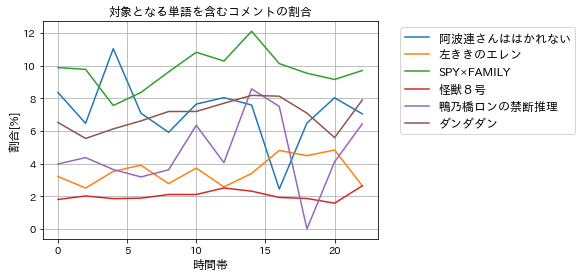

In [61]:
for work_name in work_name_list:
    plt.plot(delimitation[:-1], np.asarray(rate_dict[work_name]), label=work_name)
plt.title("対象となる単語を含むコメントの割合", fontsize=12)
plt.xlabel("時間帯", fontsize=12) 
plt.ylabel("割合[%]", fontsize=12) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True)